<a href="https://colab.research.google.com/github/tejaswi1995prakash/COVID19india-report/blob/master/NYC_Airbnb_Rental_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **NYC Airbnb Rental Price Analysis**

Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present more unique, personalized way of experiencing the world. This dataset describes the listing activity and metrics in NYC, NY for 2019.

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**First look at the Data**

In [0]:
df = pd.read_csv('/content/AB_NYC_2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


**Following are the attributes**

In [0]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

**Brief Statistics**

In [0]:
df.describe(include= 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,48895,NaN,NaN,NaN,1.90171e+07,1.09831e+07,2539,9.47194e+06,1.96773e+07,2.91522e+07,3.64872e+07
name,48879,47905,Hillside Hotel,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_id,48895,NaN,NaN,NaN,6.762e+07,7.8611e+07,2438,7.82203e+06,3.07938e+07,1.07434e+08,2.74321e+08
host_name,48874,11452,Michael,417,NaN,NaN,NaN,NaN,NaN,NaN,NaN
neighbourhood_group,48895,5,Manhattan,21661,NaN,NaN,NaN,NaN,NaN,NaN,NaN
neighbourhood,48895,221,Williamsburg,3920,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,48895,NaN,NaN,NaN,40.7289,0.0545301,40.4998,40.6901,40.7231,40.7631,40.9131
longitude,48895,NaN,NaN,NaN,-73.9522,0.0461567,-74.2444,-73.9831,-73.9557,-73.9363,-73.713
room_type,48895,3,Entire home/apt,25409,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,48895,NaN,NaN,NaN,152.721,240.154,0,69,106,175,10000


**Some of the common observations are :**

Manhattan is the most common neighbourhood group in NYC.

Williamsburg is the most common neighbourhood in NYC.

The most common room type is Entire home/apt.

The average price per room in NYC is $152.721



**Missing Value check**

In [0]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

The reviews per month seem to be dependent on last reviews as both have the same number of missing values.

**Average Price in Neighbourhood Group**

In [0]:
price_nhood = df.groupby('neighbourhood_group').mean()[['price']].sort_values(by = 'price',ascending = False).reset_index()
price_nhood

,neighbourhood_group,price
0,Manhattan,196.875814
1,Brooklyn,124.383207
2,Staten Island,114.812332
3,Queens,99.517649
4,Bronx,87.496792


Text(0, 0.5, 'Average Price')

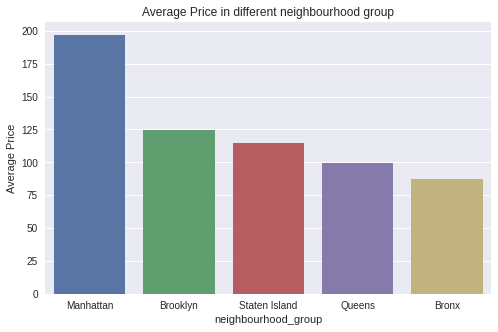

In [0]:
plt.figure(figsize = (8,5))
plt.title('Average Price in different neighbourhood group')
sns.barplot(x=price_nhood.neighbourhood_group, y=price_nhood.price)
plt.ylabel('Average Price')

The average price in Manhattan is almost twice as that of the other neighbourhood groups. Manhattan also known as upper east side is an affluent residential area in NYC.

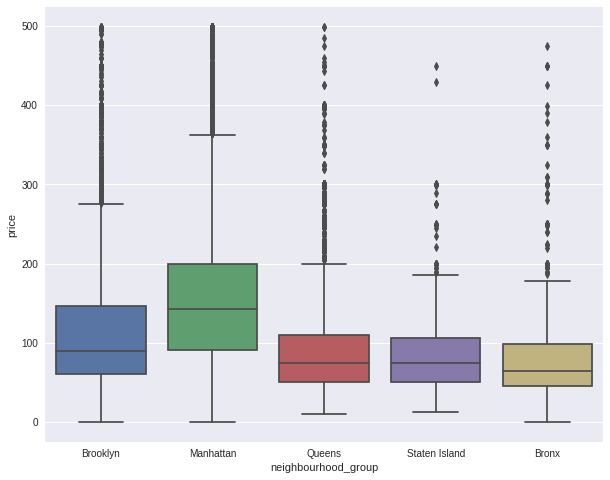

In [0]:
df_500 = df[df.price<500]
plt.figure(figsize=(10,8))
sns.boxplot(x= df_500['neighbourhood_group'],y =df_500['price'])
plt.show()

The boxplot represents the housing prices across different neighbourhood groups. The data has been curtailed to hotels within 500 dollars to get a better visualization.

The image speaks for itself showing that Manhattan is the costliest followed by Brooklyn.

**Latitude vs Price**

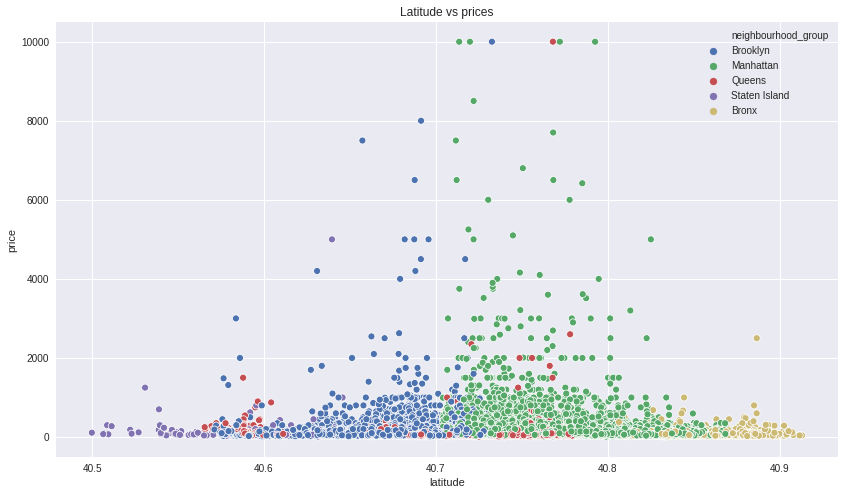

In [0]:
plt.figure(figsize=(14,8))
sns.scatterplot(df['latitude'],df['price'],hue= df['neighbourhood_group'])
plt.title('Latitude vs prices')
plt.show()

We can see that most of the rental places above 2000 dollars is loacted between 40.6 degree to the east till 40.8 degree.

**Longitude vs Prices**

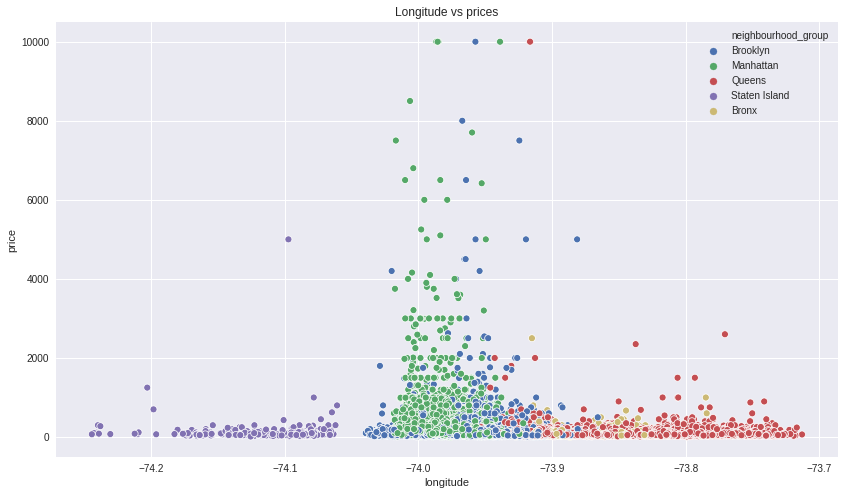

In [0]:
plt.figure(figsize=(14,8))
sns.scatterplot(df['longitude'],df['price'],hue = df['neighbourhood_group'])
plt.title('Longitude vs prices')
plt.show()

Likewise to Latitude, most of the rental places above 2000 dollars seems to be concentrated in a particular area i.e between -74.03 degree longitude to north of it till -73.9 degree longitude.

**Dropping the Null values in Name column**

In [0]:
notnul_data = df[df.name.notnull()]

**Let us see the most common words used in Name Description**

In [0]:
words = []
for sentences in notnul_data.name:
  t = sentences.split()
  for word in t:
    words.append(word)
    

In [0]:
text = ''
for i in words:
  text = text + i


In [0]:
from collections import Counter
Counter = Counter(words)
freq = Counter.most_common(10)

In [0]:
frq_words = []
words_count = []
for items in freq:
  x,y = items
  frq_words.append(x)
  words_count.append(y)


Text(0, 0.5, 'words')

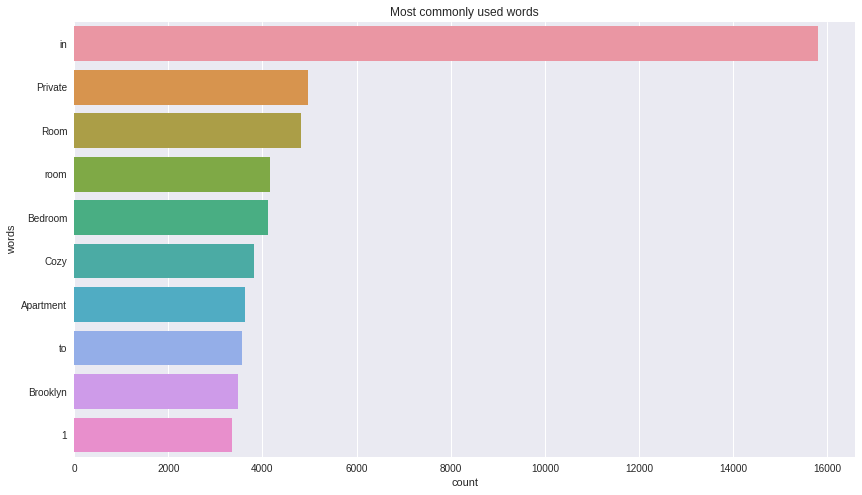

In [0]:
plt.figure(figsize=(14,8))
plt.title('Most commonly used words')
sns.barplot(y = frq_words,x = words_count,orient= "h" )
plt.xlabel('count')
plt.ylabel('words')

The owners of the place don't seem to use fancy high sounding words to lure the customers rather they describe the place in simple adjectives.

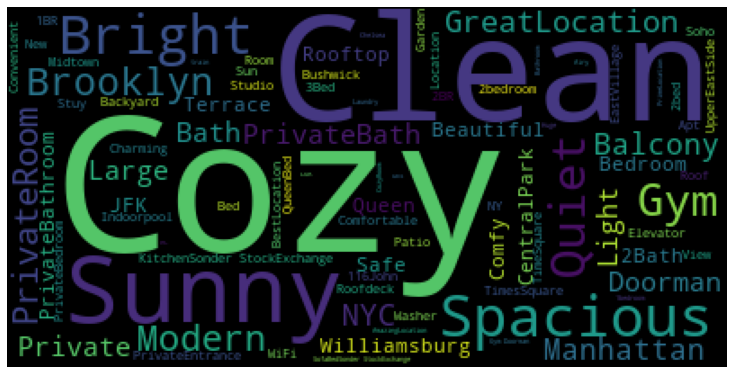

In [0]:
from wordcloud import WordCloud, ImageColorGenerator
wordcloud = WordCloud(max_words=200, background_color="black").generate(text)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

The above image helps us to see the most frequently used words to describe a place.

**Location of the property**

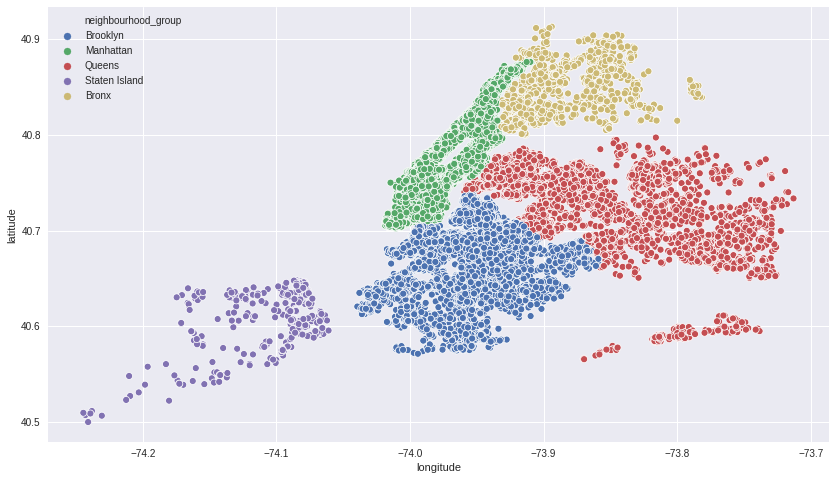

In [0]:
plt.figure(figsize=(14,8))
sns.scatterplot(df.longitude,df.latitude,hue=df.neighbourhood_group)
plt.ioff()

This map establishes the distinguishness between different neighbourhood group 

**Categorizing hotels according to price range**

In [0]:
def price_category(rows):
    if rows.price<=70:
        return 'Low'
    elif rows.price >= 70 and rows.price<=175:
        return 'Medium'
    else:
        return 'High'


In [0]:
df['price_category'] = df.apply(price_category,axis = 'columns')


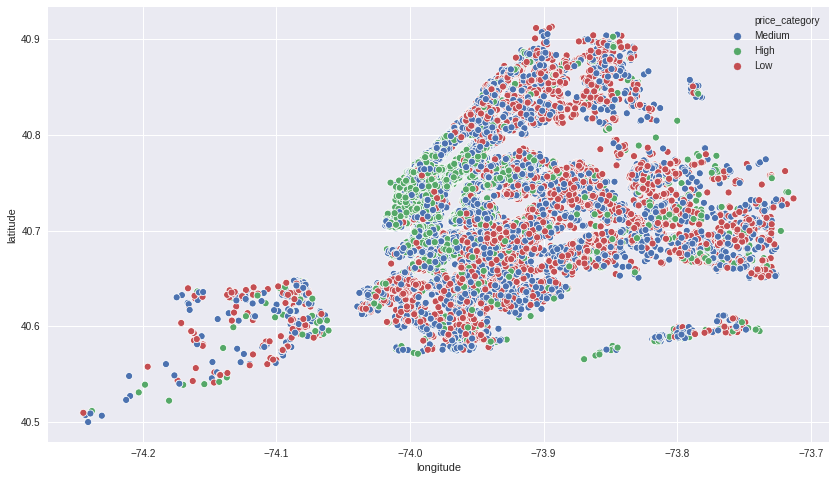

In [0]:
plt.figure(figsize=(14,8))
sns.scatterplot(df.longitude,df.latitude,hue=df.price_category)
plt.ioff()

We can see that most of the Expensive rental places are around the Manhattan area.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f87715f5cc0>],
      dtype=object)

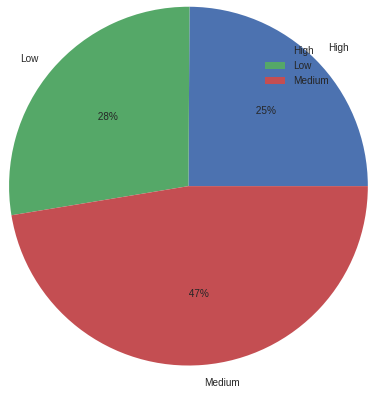

In [0]:
df.groupby('price_category').count()[['id']].plot(kind= 'pie',subplots =True,radius =1.5,autopct = ' %0.f%%')

About 47% of the hotels fall in the medium price range i.e 70 dollars to 175 dollars.

In [0]:
plt.figure(figsize=(14,8))
sns.boxplot(x=calhousing_data['ocean_proximity'],y=calhousing_data['median_house_value'])
plt.show()

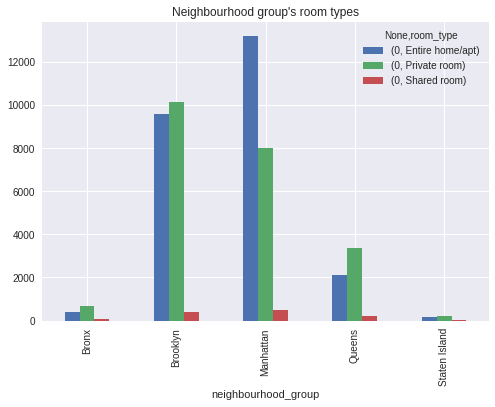

In [0]:
df.groupby(['neighbourhood_group','room_type']).size().to_frame().unstack(level= -1).plot(kind = 'bar')
plt.title("Neighbourhood group's room types")
plt.show()

The number of rental properties available in Manhattan and Brooklyn is phenomenally higher than the other Neighbourhood groups.

We can infer that tourists are more attracted to Brooklyn and Manhattan than other parts of NYC.

Also Manhattan seems to be the only neighbourhood place in NYC wherein there are more number of Entire house/Apt for rent than Private rooms.

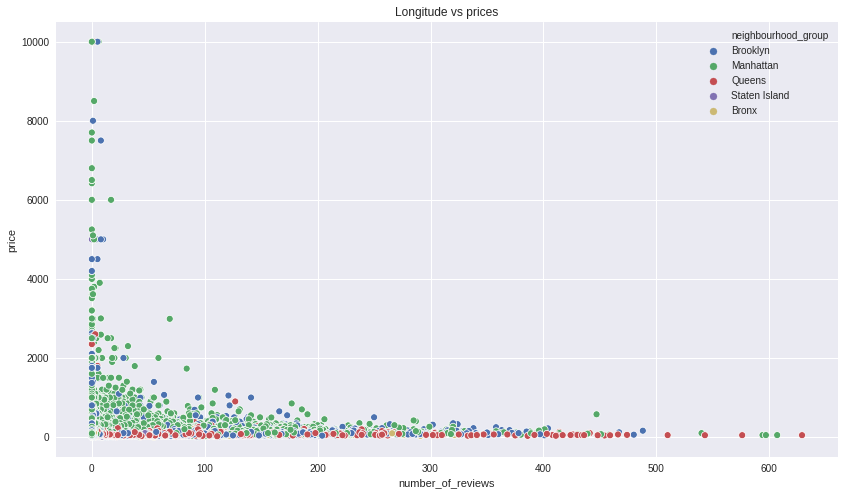

In [0]:
plt.figure(figsize=(14,8))
sns.scatterplot(df['number_of_reviews'],df['price'],hue = df['neighbourhood_group'])
plt.title('Longitude vs prices')
plt.show()

With the increasing number of reviews the rental price of the property has gone down. One of the reasioning could be that the rental property with more reviews is relatively old and hence the price is lesser.